[(0.719, 0.929), (0.641, 0.89), (0.659, 0.948), (0.083, 0.16), (0.042, 0.111), (0.638, 0.931), (0.017, 0.046), (0.015, 0.034), (0.158, 0.319), (0.577, 0.948), (0.003, 0.012), (0.008, 0.021), (0.114, 0.199), (0.033, 0.066), (0.707, 0.965), (0.008, 0.02), (0.01, 0.024), (0.095, 0.175), (0.049, 0.107), (0.405, 0.661), (0.562, 0.926), (0.005, 0.011), (0.003, 0.01), (0.057, 0.118), (0.016, 0.042), (0.127, 0.239), (0.108, 0.205), (0.643, 0.911), (0.008, 0.02), (0.009, 0.025), (0.047, 0.108), (0.041, 0.1), (0.125, 0.277), (0.041, 0.071), (0.381, 0.63), (0.625, 0.931), (0.0, 0.0), (0.0, 0.0), (0.018, 0.029), (0.0, 0.0), (0.088, 0.131), (0.037, 0.06), (0.064, 0.094), (0.094, 0.154), (0.756, 0.93), (0.0, 0.0), (0.0, 0.0), (0.015, 0.04), (0.0, 0.0), (0.063, 0.104), (0.031, 0.044), (0.065, 0.093), (0.068, 0.089), (0.502, 0.699), (0.603, 0.907)]


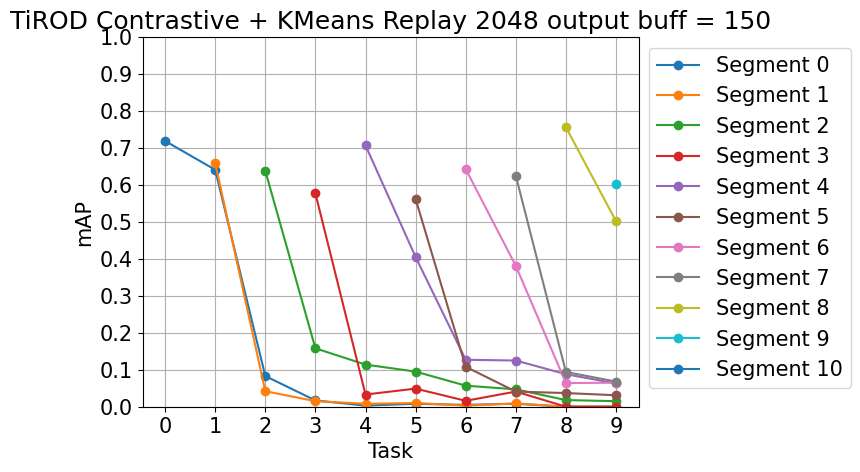

In [1]:
import re
import matplotlib.pyplot as plt
import numpy as np

def extract_values(filename):
    with open(filename, 'r') as file:
        content = file.read()

    ap_values = []
    ap_50_95_all_pattern = re.compile(r"Average Precision  \(AP\) @\[ IoU=0.50:0.95 \| area=   all \| maxDets=100 \] = (\d+\.\d+)")
    ap_50_all_pattern = re.compile(r"Average Precision  \(AP\) @\[ IoU=0.50      \| area=   all \| maxDets=100 \] = (\d+\.\d+)")
    for match in re.finditer("-----STARTING TESTING ON ALL TASK DATASETS-----", content):
        start = match.end()
        #end = content.find("INFO: LORIS analysis:", start)
        end = content.find("INFO: TiROD analysis:", start)
        while start < end:
            ap_50_95_all = ap_50_95_all_pattern.search(content, start, end)
            ap_50_all = ap_50_all_pattern.search(content, start, end)
            if ap_50_95_all and ap_50_all:
                ap_values.append((float(ap_50_95_all.group(1)), float(ap_50_all.group(1))))
                start = max(ap_50_95_all.end(), ap_50_all.end())
            else:
                break

    return ap_values

results= extract_values("../results/TiROD/EWC.txt")
print(results)
APomAP = 0 #(1 ap 0 mAP)
title = 'TiROD Contrastive + KMeans Replay 2048 output buff = 150'

ordered_results = []
start = 0
for i in range(1, len(results)):
    ordered_results.append(results[start:start+i])
    start += i
    if start >= len(results):
        break

plt.rcParams.update({'font.size': 15})
for i in range(0,11): #0,9
    segment = []
    for sublist in ordered_results:
        try:
            segment.append(sublist[i][APomAP])
        except:
            segment.append(None)
    plt.plot(segment, marker='o',label=f'Segment {i}')

plt.xlabel('Task')
plt.ylabel('AP' if APomAP == 1 else 'mAP')
plt.title(title)
plt.xticks(np.arange(10)) #9
plt.yticks(np.arange(0, 1.1, 0.1))  # Set y ticks from 0 to 1
plt.ylim(0)  # Set y limits from 0 to 1
plt.grid(True)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

In [2]:
#CUMULATIVE
results=[]
results= extract_values("../results/TiROD/cumul.txt")
ordered_results = []
start = 0
for i in range(1, len(results)):
    ordered_results.append(results[start:start+i])
    start += i
    if start >= len(results):
        break

running_sum = 0
old = []
new = []
all = []
for i in range(10):
    running_sum = 0
    for item in ordered_results[i]:
        running_sum += item[0]
    all.append(running_sum/(i+1))
    old.append((running_sum-item[0])/i if i > 0 else item[0])
    new.append(item[0])
    print("TASK " + str(i+1))
    print("All " +  str(running_sum/(i+1)))
    print("Old " + str((running_sum-item[0])/i if i > 0 else item[0]))
    print("New " + str(item[0]))

TASK 1
All 0.719
Old 0.719
New 0.719
TASK 2
All 0.696
Old 0.7299999999999999
New 0.662
TASK 3
All 0.6779999999999999
Old 0.6934999999999999
New 0.647
TASK 4
All 0.66575
Old 0.6963333333333334
New 0.574
TASK 5
All 0.678
Old 0.67625
New 0.685
TASK 6
All 0.6563333333333333
Old 0.6722
New 0.577
TASK 7
All 0.6604285714285715
Old 0.6635000000000001
New 0.642
TASK 8
All 0.66425
Old 0.6671428571428571
New 0.644
TASK 9
All 0.6638888888888889
Old 0.6557499999999999
New 0.729
TASK 10
All 0.6637
Old 0.666111111111111
New 0.642


In [3]:
#Method to compare
results=[]
results= extract_values("../results/TiROD/SID.txt")
ordered_results = []
start = 0
for i in range(1, len(results)):
    ordered_results.append(results[start:start+i])
    start += i
    if start >= len(results):
        break

running_sum = 0
old1 = []
new1 = []
all1 = []
for i in range(10):
    running_sum = 0
    for item in ordered_results[i]:
        running_sum += item[0]
    all1.append(running_sum/(i+1))
    old1.append((running_sum-item[0])/i if i > 0 else item[0])
    new1.append(item[0])
    print("TASK " + str(i+1))
    print("All " +  str(running_sum/(i+1)))
    print("Old " + str((running_sum-item[0])/i if i > 0 else item[0]))
    print("New " + str(item[0]))

TASK 1
All 0.719
Old 0.719
New 0.719
TASK 2
All 0.6495
Old 0.712
New 0.587
TASK 3
All 0.4803333333333333
Old 0.5135
New 0.414
TASK 4
All 0.28875
Old 0.23466666666666666
New 0.451
TASK 5
All 0.31020000000000003
Old 0.25475000000000003
New 0.532
TASK 6
All 0.3233333333333333
Old 0.28819999999999996
New 0.499
TASK 7
All 0.2982857142857143
Old 0.24716666666666667
New 0.605
TASK 8
All 0.278875
Old 0.2324285714285714
New 0.604
TASK 9
All 0.19777777777777775
Old 0.13237499999999996
New 0.721
TASK 10
All 0.1799
Old 0.13366666666666666
New 0.596


In [4]:
#Method to compare
results=[]
results= extract_values("../results/TiROD/Naive.txt")
ordered_results = []
start = 0
for i in range(1, len(results)):
    ordered_results.append(results[start:start+i])
    start += i
    if start >= len(results):
        break

running_sum = 0
old2 = []
new2 = []
all2 = []
for i in range(10):
    running_sum = 0
    for item in ordered_results[i]:
        running_sum += item[0]
    all2.append(running_sum/(i+1))
    old2.append((running_sum-item[0])/i if i > 0 else item[0])
    new2.append(item[0])
    print("TASK " + str(i+1))
    print("All " +  str(running_sum/(i+1)))
    print("Old " + str((running_sum-item[0])/i if i > 0 else item[0]))
    print("New " + str(item[0]))

TASK 1
All 0.719
Old 0.719
New 0.719
TASK 2
All 0.639
Old 0.638
New 0.64
TASK 3
All 0.26233333333333336
Old 0.068
New 0.651
TASK 4
All 0.18974999999999997
Old 0.06299999999999999
New 0.57
TASK 5
All 0.16440000000000002
Old 0.037500000000000006
New 0.672
TASK 6
All 0.2001666666666667
Old 0.11740000000000002
New 0.614
TASK 7
All 0.1382857142857143
Old 0.055499999999999994
New 0.635
TASK 8
All 0.160375
Old 0.09657142857142856
New 0.607
TASK 9
All 0.11477777777777777
Old 0.03662499999999999
New 0.74
TASK 10
All 0.1274
Old 0.07122222222222223
New 0.633


In [5]:
print(all)
print(all1)
print(all2)

[0.719, 0.696, 0.6779999999999999, 0.66575, 0.678, 0.6563333333333333, 0.6604285714285715, 0.66425, 0.6638888888888889, 0.6637]
[0.719, 0.6495, 0.4803333333333333, 0.28875, 0.31020000000000003, 0.3233333333333333, 0.2982857142857143, 0.278875, 0.19777777777777775, 0.1799]
[0.719, 0.639, 0.26233333333333336, 0.18974999999999997, 0.16440000000000002, 0.2001666666666667, 0.1382857142857143, 0.160375, 0.11477777777777777, 0.1274]


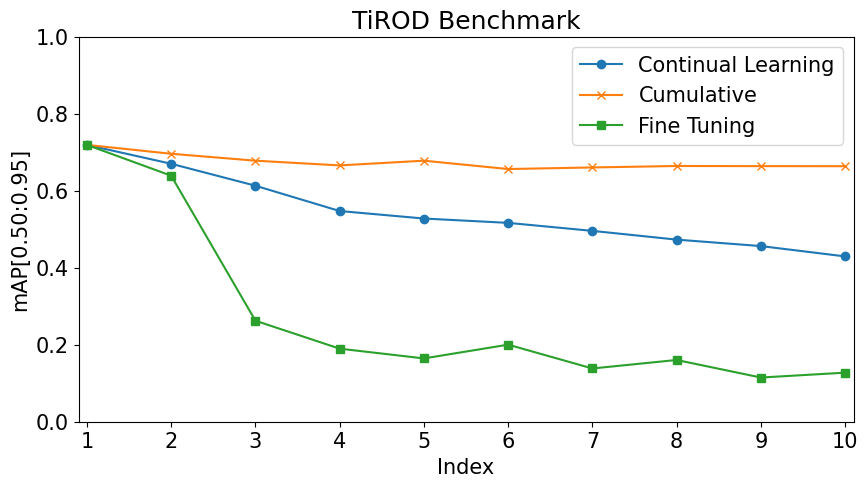

In [35]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML

# Data from the active selection

fig, ax = plt.figure(figsize=(10, 5)), plt.gca()

# Initialize the lines
line1, = ax.plot([], [], label='Continual Learning', marker='o')
line2, = ax.plot([], [], label='Cumulative', marker='x')
line3, = ax.plot([], [], label='Fine Tuning', marker='s')

# Adding labels and title
ax.set_xlabel('Index')
ax.set_ylabel('mAP[0.50:0.95]')
ax.set_title('TiROD Benchmark')

# Setting y-axis limits
ax.set_ylim(0, 1)

# Setting x-axis limits and ticks
ax.set_xlim(0.9, 10.1)
ax.set_xticks(range(1, 11))

# Adding a legend
ax.legend()

# Update function for animation
def update(num):
    line1.set_data(range(1, num + 1), all1[:num])
    line2.set_data(range(1, num + 1), all[:num])
    line3.set_data(range(1, num + 1), all2[:num])
    return line1, line2,line3

# Create animation
ani = animation.FuncAnimation(fig, update, frames=len(all1)+1, interval=600, blit=True)

# Display the animation
HTML(ani.to_jshtml())

In [6]:
stability = 0
plasticity = 0
for i in range(1,10):
    stability += (old[i]-old1[i])/old[i] #(Smaller = better -> small difference with cumulative)
    plasticity += (new[i]-new1[i])/new[i] #(Smaller = better -> small difference with cumulative)

stability = 1-stability/9
plasticity = 1-plasticity/9
omega = all1[9]/all[9]

print("Omega: " + str(omega))
print("Stability: " + str(stability))
print("Plasticity: " + str(plasticity))


Omega: 0.2608106072020491
Stability: 0.38328508763697333
Plasticity: 0.6928185022472895
